# 🌦️ ID3 Decision Tree Implementation on Weather Forecasting Dataset

In [3]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

# Load dataset
df = pd.read_csv('Project1WeatherDataset.csv')
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:

# Basic info and preprocessing
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Drop missing values if any
df = df.dropna()

# Encode categorical columns if needed
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

print("\nData after encoding:")
df.head()


Shape: (8784, 8)

Missing Values:
 Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Data after encoding:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,0,-1.8,-3.9,86,4,8.0,101.24,7
1,11,-1.8,-3.7,87,4,8.0,101.24,7
2,16,-1.8,-3.4,89,7,4.0,101.26,9
3,17,-1.5,-3.2,88,6,4.0,101.27,9
4,18,-1.5,-3.3,88,7,4.8,101.23,7


In [6]:

# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7027, 7)
Testing set size: (1757, 7)


## 🧮 Manual Implementation of ID3 Algorithm (Using Entropy and Information Gain)

In [7]:

# Entropy calculation
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

# Information Gain calculation
def information_gain(X_col, y, threshold):
    parent_entropy = entropy(y)
    left_indices = X_col <= threshold
    right_indices = X_col > threshold
    n = len(y)
    n_left, n_right = np.sum(left_indices), np.sum(right_indices)
    if n_left == 0 or n_right == 0:
        return 0
    child_entropy = (n_left/n)*entropy(y[left_indices]) + (n_right/n)*entropy(y[right_indices])
    return parent_entropy - child_entropy

# Recursive ID3 implementation
class ID3Tree:
    def __init__(self, depth=0, max_depth=3):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.predicted_class = None

    def fit(self, X, y):
        classes, counts = np.unique(y, return_counts=True)
        self.predicted_class = classes[np.argmax(counts)]
        if self.depth < self.max_depth and len(classes) > 1:
            best_gain = 0
            for feature_index in range(X.shape[1]):
                thresholds = np.unique(X[:, feature_index])
                for t in thresholds:
                    gain = information_gain(X[:, feature_index], y, t)
                    if gain > best_gain:
                        best_gain = gain
                        self.feature_index = feature_index
                        self.threshold = t
            if best_gain > 0:
                left_indices = X[:, self.feature_index] <= self.threshold
                right_indices = X[:, self.feature_index] > self.threshold
                self.left = ID3Tree(depth=self.depth+1, max_depth=self.max_depth)
                self.left.fit(X[left_indices], y[left_indices])
                self.right = ID3Tree(depth=self.depth+1, max_depth=self.max_depth)
                self.right.fit(X[right_indices], y[right_indices])

    def predict_one(self, x):
        if self.left is None or self.right is None:
            return self.predicted_class
        if x[self.feature_index] <= self.threshold:
            return self.left.predict_one(x)
        else:
            return self.right.predict_one(x)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


In [8]:

# Train Manual ID3 Model
id3_manual = ID3Tree(max_depth=4)
id3_manual.fit(X_train.values, y_train.values)

# Predict
y_pred_manual = id3_manual.predict(X_test.values)

# Evaluate
print("Manual ID3 Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_manual))
print("\nClassification Report:\n", classification_report(y_test, y_pred_manual))


Manual ID3 Results:
Accuracy: 0.33352305065452476

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.38      0.13      0.20       356
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.36      0.71      0.48        35
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.30      0.88      0.45       414
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.37      0.14      0.21       416
      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 🤖 ID3 Implementation using Scikit-learn (criterion='entropy')

In [9]:

# Train sklearn ID3 (Decision Tree with Entropy)
id3_sklearn = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
id3_sklearn.fit(X_train, y_train)

# Predictions
y_pred_sklearn = id3_sklearn.predict(X_test)

# Evaluate sklearn ID3
print("Sklearn ID3 Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))


Sklearn ID3 Results:
Accuracy: 0.33352305065452476

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.38      0.13      0.20       356
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.36      0.71      0.48        35
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.30      0.88      0.45       414
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.37      0.14      0.21       416
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


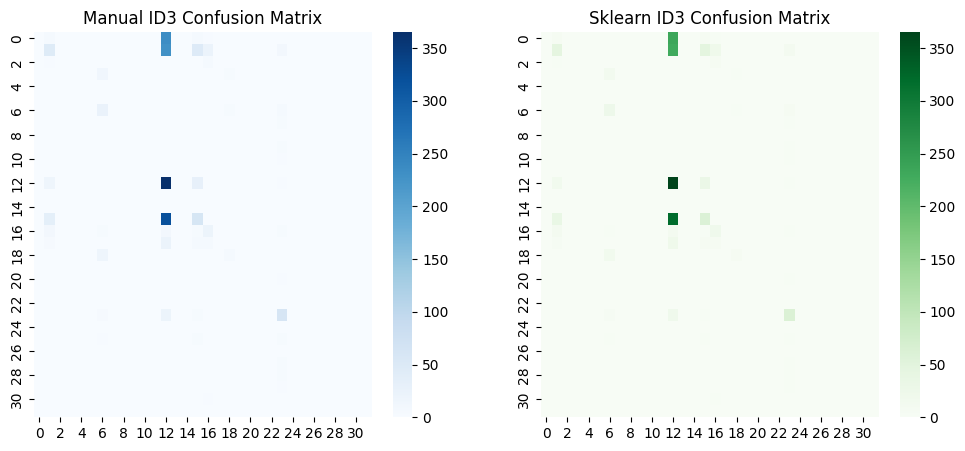

In [12]:

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_manual), fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Manual ID3 Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Sklearn ID3 Confusion Matrix")
plt.show()


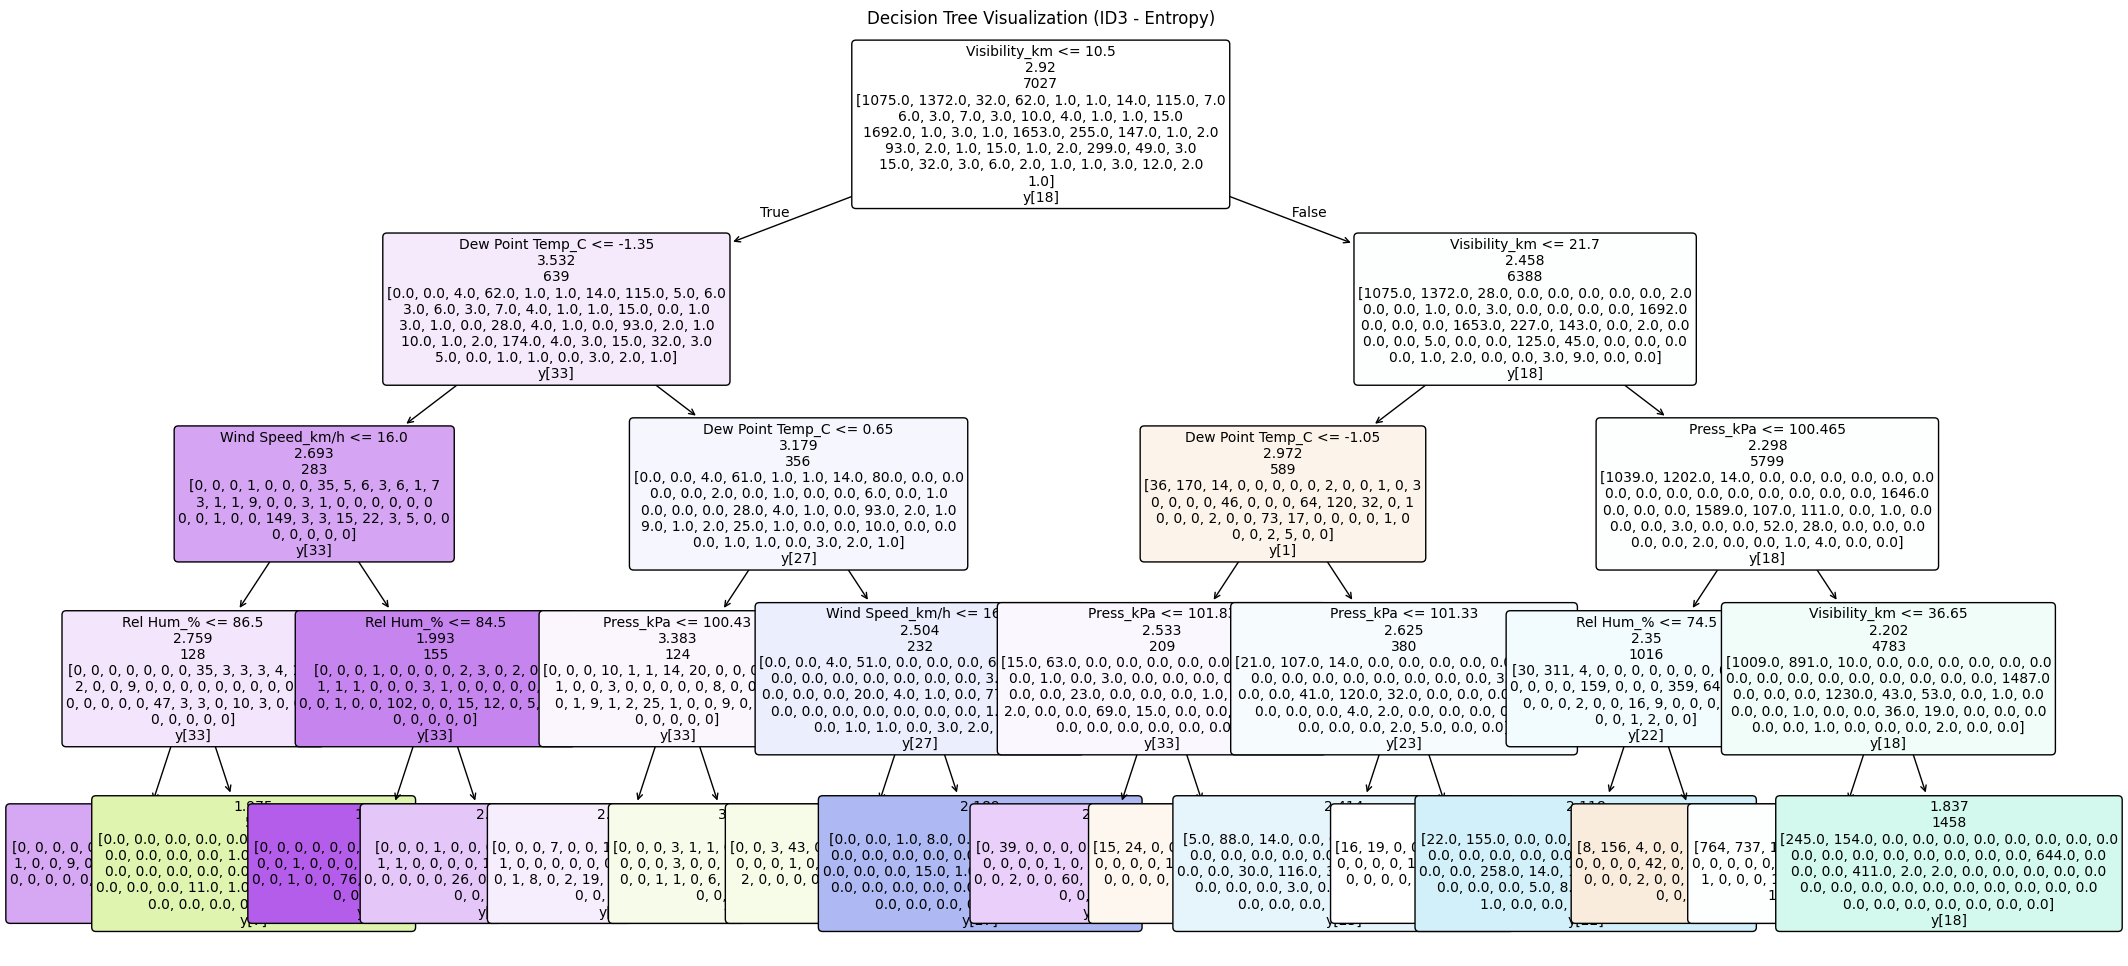

In [13]:

# Visualize sklearn decision tree
plt.figure(figsize=(25,12))
plot_tree(id3_sklearn, filled=True, feature_names=X.columns, class_names=True, rounded=True, fontsize=10, label='none')
plt.title("Decision Tree Visualization (ID3 - Entropy)")
plt.show()
